# Libraries

In [123]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram , linkage

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

# Import Data

In [24]:
data = pd.read_csv("./Dataset/segmentationdata.csv", index_col=0)

In [25]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [26]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Data Correlation

In [27]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


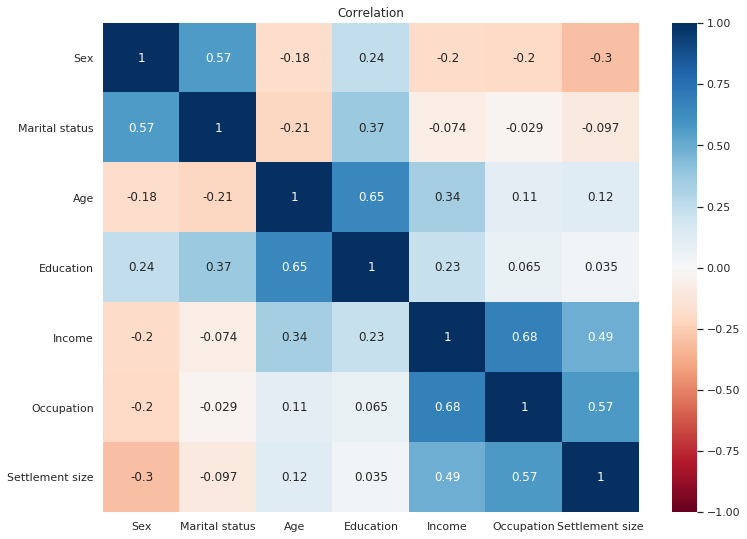

In [28]:
plt.figure(figsize= (12,9))
s = sns.heatmap(data.corr(),
               annot=True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
plt.title("Correlation")
plt.show()

Text(0, 0.5, 'Income')

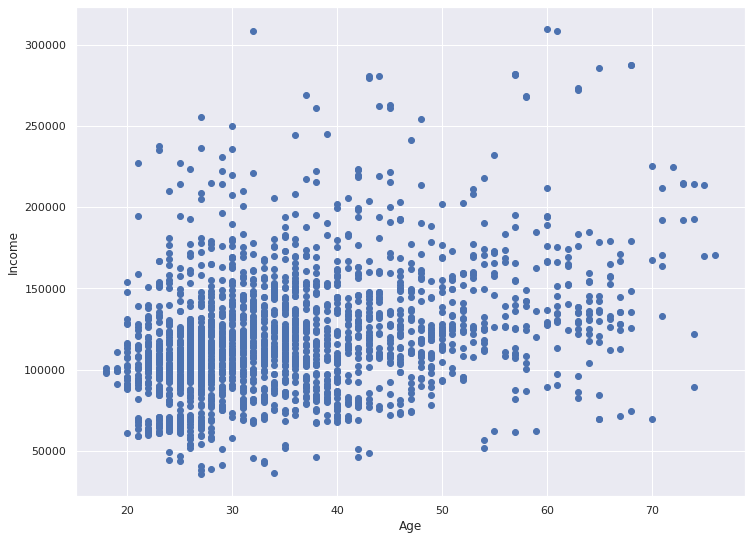

In [29]:
plt.figure(figsize= (12,9))
plt.scatter(data.loc[:,"Age"],data.loc[:,"Income"])
plt.xlabel('Age')
plt.ylabel('Income')

# Standarisation

In [34]:
scaler = StandardScaler()
df_std = scaler.fit_transform(data)

In [35]:
df = pd.DataFrame(df_std)
df.columns = data.columns
df.index = data.index

In [36]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


# Hierarchical Clustering

In [37]:
##df = data
hCluster = linkage(df,method='ward')

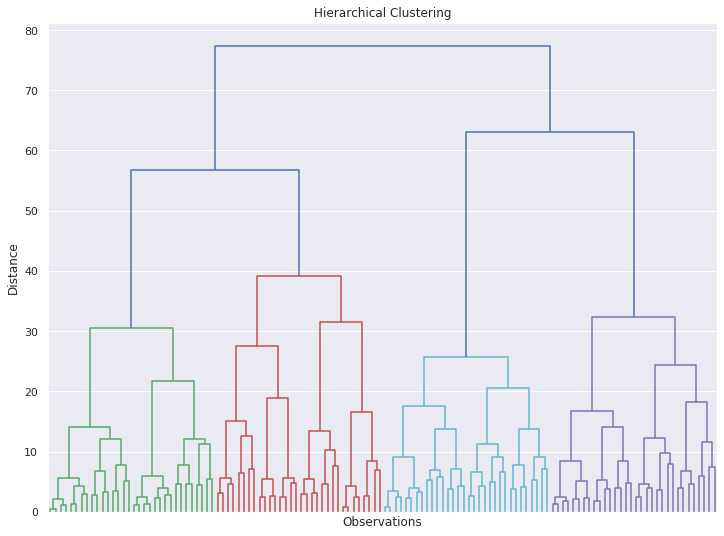

In [38]:
plt.figure(figsize= (12,9))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hCluster,
           truncate_mode= "level",
           p = 6,
          show_leaf_counts = False,
          no_labels = True,
          )
plt.show()

In [39]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = "k-means++", random_state = 50)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

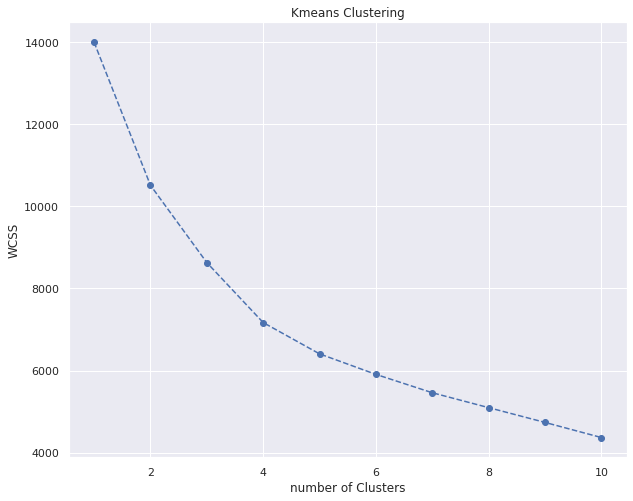

In [40]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Kmeans Clustering')
plt.xlabel('number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters= 4 , init = "k-means++", random_state = 42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [53]:
df_kmeans = df.copy()
df_kmeans["kmean segment"] = kmeans.labels_

In [54]:
df_kmeans.groupby(['kmean segment']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
kmean segment,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
3,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380


In [55]:
df_kmeans["kmean segment"].replace(3,'well-off',inplace=True)
df_kmeans["kmean segment"].replace(1,'Career-Focused',inplace=True)
df_kmeans["kmean segment"].replace(2,'fewer-opportunities',inplace=True)
df_kmeans["kmean segment"].replace(0,'standard',inplace=True)
df_kmeans.groupby(['kmean segment']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
kmean segment,,,,,,,
Career-Focused,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
fewer-opportunities,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
standard,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
well-off,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380


In [56]:
df_seg = df_kmeans.groupby(['kmean segment']).mean()
df_seg['nbr obs'] = df_kmeans[['kmean segment','Sex']].groupby(['kmean segment']).count()
df_seg['%%'] = df_seg['nbr obs'] * 100 / df_seg['nbr obs'].sum()
df_seg

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,nbr obs,%%
kmean segment,,,,,,,,,
Career-Focused,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438,462,23.10
fewer-opportunities,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888,570,28.50
standard,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039,263,13.15
well-off,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380,705,35.25


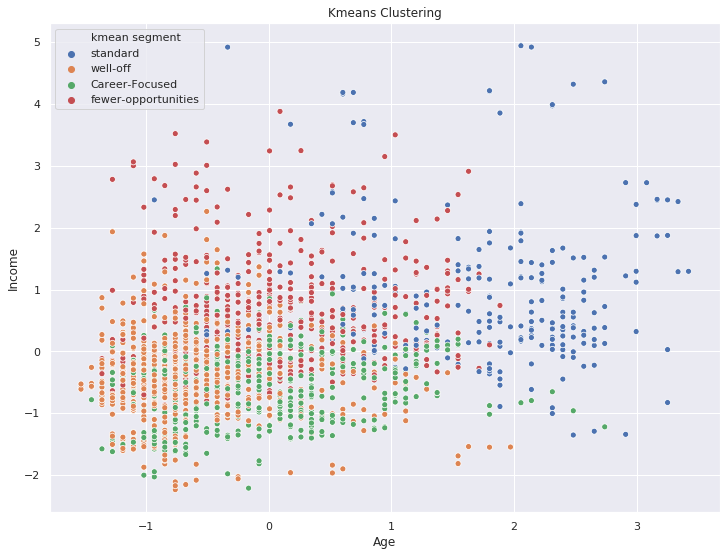

In [57]:
plt.figure(figsize=(12,9))
plt.title('Kmeans Clustering')
sns.scatterplot(df_kmeans['Age'],df_kmeans['Income'], hue = df_kmeans["kmean segment"])


## PCA

In [59]:
pca = PCA()

In [60]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Comulative Variance')

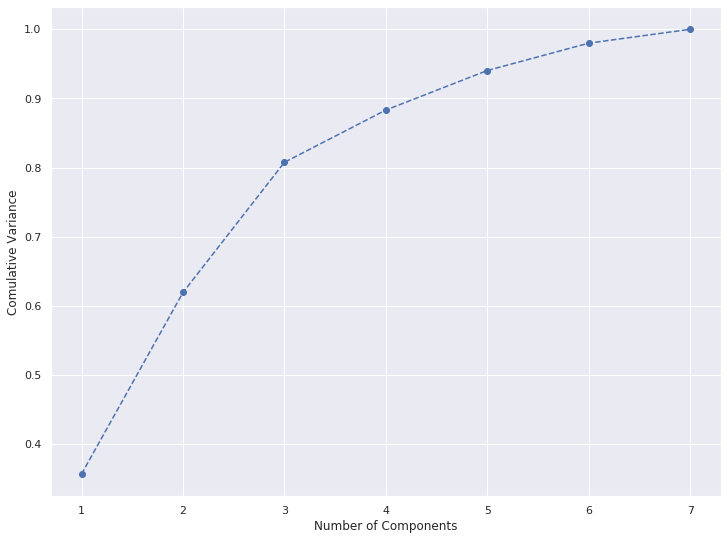

In [64]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle= '--' )
plt.xlabel('Number of Components')
plt.ylabel('Comulative Variance')

In [102]:
pca  = PCA(n_components = 3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## PCA Results

In [103]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [104]:
df_pca = pd.DataFrame(data = pca.components_,
                     columns = df.columns.values,
                     index = ["Component 1","Component 2","Component 3"])
df_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


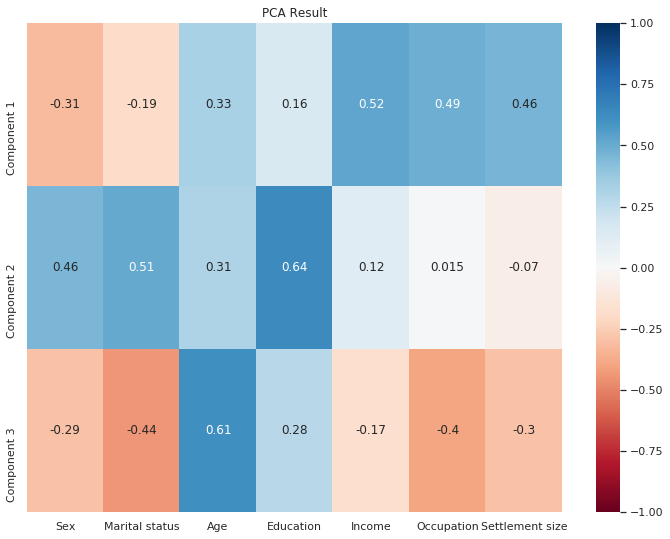

In [105]:
plt.figure(figsize= (12,9))
s = sns.heatmap(df_pca,
               annot=True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
plt.title("PCA Result")
plt.show()

In [106]:
df_pca = pca.transform(df)
df_pca = pd.DataFrame(data=df_pca,
                     columns=["Component 1","Component 2","Component 3"])
df_pca.head(3)

,Component 1,Component 2,Component 3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419


# Kmeans with PCA

In [107]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = "k-means++", random_state = 50)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

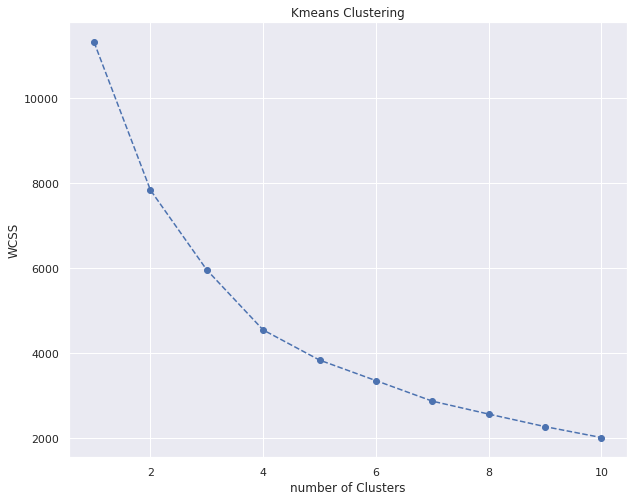

In [108]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Kmeans Clustering')
plt.xlabel('number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
kmeans_pca = KMeans(n_clusters= 4 , init = "k-means++", random_state = 42)
kmeans_pca.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Kmeans with PCA Results

In [115]:
df_pca_kmeans = pd.concat([data.reset_index(drop=True), df_pca],axis=1)
df_pca_kmeans["kmean segment"] = kmeans_pca.labels_
df_pca_kmeans.groupby(['kmean segment']).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
kmean segment,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


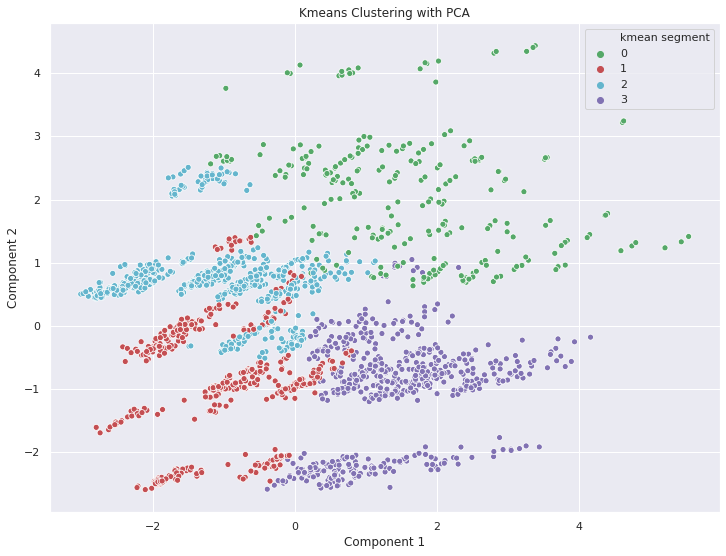

In [121]:
plt.figure(figsize=(12,9))
plt.title('Kmeans Clustering with PCA')
sns.scatterplot(df_pca_kmeans['Component 1'],
                df_pca_kmeans['Component 2'], 
                hue = df_pca_kmeans["kmean segment"],
               palette = ['g','r','c','m'])

# Exporting Model

In [124]:
pickle.dump(scaler,open("scaler.pickle","wb"))

In [125]:
pickle.dump(pca,open("pca.pickle","wb"))

In [126]:
pickle.dump(kmeans_pca,open("kmeans_pca.pickle","wb"))